In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import functions as f

In [2]:
df_beta = pd.read_csv('result2.csv')
df_beta.head()

,Date,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
0,2019-10-24,0.683423,1.499121,1.428348,1.080093,1.162515,0.298545,0.818730,1.139876,1.000031,...,-0.216832,1.032757,1.271839,1.549078,1.028796,0.637227,1.745512,0.491763,0.709564,1.737399
1,2019-10-25,0.657976,1.589301,1.417874,1.116175,1.231752,0.330161,0.880601,1.248967,0.989307,...,-0.152174,1.020892,1.304210,1.609413,1.028594,0.607869,1.850071,0.478759,0.741682,1.823384
2,2019-10-28,0.675917,1.504004,1.505396,0.907603,0.986388,0.101581,0.240352,1.015470,1.049239,...,0.844589,1.029742,1.024349,0.908688,0.772672,0.904103,1.720181,0.288491,0.892279,1.226913
3,2019-10-29,0.646587,1.522459,1.563432,0.891875,0.933166,0.095068,0.253630,1.069239,1.099909,...,0.886244,0.948140,0.948151,0.909988,0.767613,0.837089,1.654258,0.248027,0.865168,1.382549
4,2019-10-30,0.837578,1.414812,1.275584,0.837900,0.870544,0.089044,0.115909,1.219332,1.217743,...,1.179153,0.933358,0.818527,0.821446,0.573677,0.705079,1.819548,0.322450,0.852061,1.468100


In [3]:
df = pd.read_csv('Nasdaq_100.csv', sep='\t')[:-1]
df['LogReturn'] = np.log(df['Close'] / df['Open'])
df['Date'] = pd.to_datetime(df['Date'])
df = df.pivot(columns='Name', index='Date', values='LogReturn').dropna(axis=0)
stock_tickers = list(df.columns)
df_index = pd.read_csv('QQQ.csv')
df_index = df_index[-493:]
df['QQQ'] = list(np.log(df_index['Close'] / df_index['Open']))
df_roll = df.rolling(20).sum()
df_roll = df_roll[-473:]
df = df[-473:].reset_index()
df.head()

Name,Date,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM,QQQ
0,2019-10-24,-0.003811,0.021210,-0.009920,0.009830,0.016438,0.009974,0.050013,0.039446,0.004423,...,-0.003372,0.002608,0.016996,0.014346,-0.002568,0.022962,-0.006640,0.009929,0.023840,0.002579
1,2019-10-25,0.013967,0.011805,0.012054,-0.000309,0.003855,-0.014103,-0.010057,0.014826,0.025075,...,0.016735,-0.008226,-0.043276,0.007017,0.022260,0.018649,-0.016055,0.016254,-0.013774,0.013120
2,2019-10-28,0.006566,-0.000847,0.010437,-0.000615,0.000000,-0.003528,0.028598,0.016286,0.015857,...,-0.008795,-0.002622,0.004462,-0.002779,-0.004292,-0.011911,-0.010039,-0.011438,0.039846,0.005176
3,2019-10-29,-0.023078,-0.000847,-0.010953,0.001229,-0.009502,0.000215,0.024025,-0.020678,-0.020971,...,-0.001910,0.015778,-0.005894,0.017639,0.012878,-0.010444,0.000799,-0.025873,-0.004266,-0.006103
4,2019-10-30,-0.006147,0.018708,-0.020663,0.033135,0.017220,0.007788,-0.011567,-0.002171,0.006055,...,-0.016336,0.011901,0.007908,0.005888,-0.005178,0.027116,0.011276,-0.018779,0.059295,0.002898


# Beta Variance
We can see in the below plots, that depending on the stock, beta varies alot when plotted against log returns of the same window. This means that we should only run beta hedging strategies on stocks with low beta variance like Microsoft and Google. Ideally, we want beta to be near constant to accurately weigh our portfolio.

Below are the beta variances of each stock, in ascending order (lower is better).

In [4]:
var_vector = df_beta[stock_tickers].var(axis=0).sort_values().to_frame().T
var_vector

,MSFT,GOOGL,GOOG,AAPL,COST,ADBE,AMZN,EA,TXN,SBUX,...,TCOM,OKTA,NTES,BIIB,PDD,TSLA,ZM,CRWD,PTON,MRNA
0,0.037338,0.049977,0.057298,0.059433,0.061935,0.075788,0.088137,0.088342,0.088472,0.095229,...,0.462615,0.477494,0.488696,0.502886,0.735897,0.842088,0.953807,0.973919,1.346391,2.155813


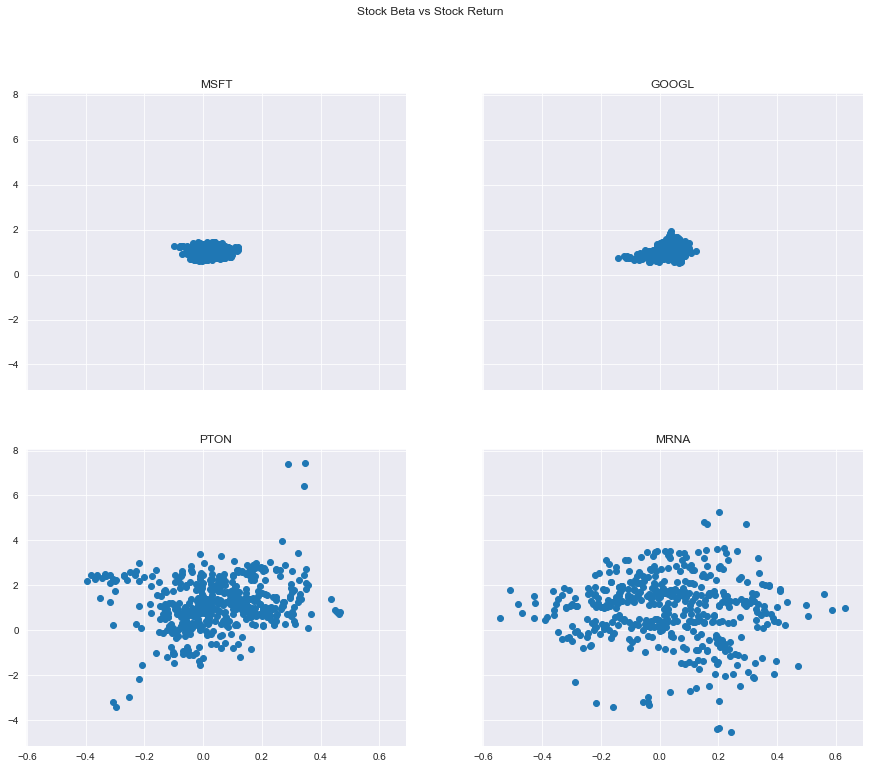

In [5]:
temp = ['MSFT', 'GOOGL', 'PTON', 'MRNA']
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
fig.suptitle('Stock Beta vs Stock Return')

for stock, ax in zip(temp, axs.ravel()):
    x = df_roll[stock]
    y = df_beta[stock]
    ax.scatter(x, y)
    ax.set_title(stock)

2 lowest and 2 highest beta variance stocks plotted

# Simulated Portfolio: Single Stock Beta Hedged

Below are simulated portfolio performances for each stock if beta hedged using the index, with a re-hedging interval of every 20 days. Included are also Sharpe ratios to compare against the sharpe of just holding the index.

In [6]:
mdr = f.calc_return(np.sum(df['QQQ']), pct=True) / 473
std = np.std(f.calc_return(df['QQQ'], pct=True))
sharpe_QQQ = 252**(1/2) * (mdr/std)
print('QQQ Sharpe: ', sharpe_QQQ)

QQQ Sharpe:  1.056153252142095


In [7]:
temp = stock_tickers
df_portfolio = pd.DataFrame([], columns=temp)
sharpe = pd.DataFrame([], columns=temp)

for stock in temp:
    count = 19
    pval = 1
    portfolio = []

    for i in range(len(df[stock])):
        if count == 19:
            beta = df_beta[stock][i]
            weight_i = beta / beta + 1
            weight_s = 1 / beta + 1
            count = 0

        s_lr = df[stock][i]
        i_lr = df['QQQ'][i]
        d_return = f.calc_return(s_lr, False)
        change = weight_s * f.calc_return(s_lr, False) - weight_i * f.calc_return(i_lr, False)
        pval += change
        portfolio.append(pval)

        count+= 1

    df_portfolio[stock] = portfolio
    mdr = (pval - 1) * 100 / 473
    std = np.std(f.calc_return(df[stock], True))
    sharpe[stock] = [252**(1/2) * (mdr/std)]

In [8]:
df_portfolio

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
0,0.985466,1.030570,0.978052,1.013860,1.025664,1.038436,1.108760,1.070366,1.003701,0.982829,...,0.978976,0.988208,0.999499,1.023041,1.023329,0.988245,1.031369,0.974757,1.018875,1.032848
1,0.993698,1.023953,0.972257,0.986853,1.006437,0.951114,1.060119,1.071993,1.028071,0.962663,...,0.583638,0.995012,0.958453,0.926935,1.010803,1.019666,1.034564,0.900030,1.031943,0.984883
2,0.999546,1.012162,0.979716,0.975289,0.996058,0.925416,1.114184,1.092438,1.049658,0.977200,...,0.571385,0.967399,0.943397,0.923915,0.994951,0.998283,1.005561,0.859350,0.994162,1.038551
3,0.955518,1.022919,0.973364,0.989825,0.990634,0.938518,1.180368,1.066186,1.020320,1.039361,...,0.626106,0.975811,0.983972,0.926412,1.042212,1.043753,1.001386,0.873944,0.944795,1.044012
4,0.934619,1.048595,0.932791,1.048903,1.017139,0.966720,1.149018,1.056311,1.026663,1.093953,...,0.597108,0.938115,0.999554,0.933672,1.048055,1.024679,1.038817,0.902540,0.894167,1.134457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,1.530401,1.076557,0.315625,1.106961,1.386803,-2.180286,0.890292,0.357071,1.080279,0.908234,...,-9.200215,0.949263,1.791916,0.878083,0.228299,0.738774,0.809933,0.675919,0.309443,-0.428864
469,1.524326,1.070886,0.302096,0.943191,1.385797,-2.191933,0.859967,0.366100,1.084745,0.906795,...,-9.208988,0.948372,1.810506,0.868294,0.210118,0.745909,0.833408,0.667270,0.321519,-0.424798
470,1.542043,1.050164,0.308487,1.181520,1.365468,-2.181461,0.849915,0.362160,1.069857,0.874361,...,-9.176165,0.947350,1.774571,0.864597,0.155820,0.752321,0.820025,0.683203,0.308903,-0.417901
471,1.526632,1.065803,0.313946,1.057073,1.388781,-2.191383,0.884158,0.345460,1.033188,0.871956,...,-9.190481,0.956227,1.862927,0.887135,0.155986,0.770912,0.810822,0.669851,0.307995,-0.444443


In [9]:
sharpe.sort_values([0], ascending=False, axis=1)

,CSX,FAST,CPRT,BIDU,EBAY,SIRI,KDP,CTSH,NTES,TEAM,...,SGEN,GILD,BKNG,REGN,AEP,PEP,TSLA,FOXA,PAYX,FOX
0,39.585425,24.32587,17.029503,14.138336,8.592118,8.310953,5.06068,4.920622,4.312471,3.922552,...,-4.199924,-4.629497,-4.718605,-4.772498,-6.230708,-7.18602,-9.736202,-10.317367,-16.626197,-17.855823


Here I exclude sharpes outside the range $[-10, 10]$, I think they are due to events like splits, reverse splits, and mergers that cause them to be extreme. Either that or they had really volatile day and the re-hedging of beta values "locked in" whatever gain/loss from that day.

In [10]:
df_results = pd.DataFrame([])
df_results['sharpe'] = sharpe.T
df_results['variance'] = var_vector.T
df_results['total_return'] = df_portfolio.iloc[472]
df_results = df_results.loc[(df_results['sharpe'] >= -10) & (df_results['sharpe'] <= 10)]

Text(0.5, 1.0, 'Sharpe Ratio vs Variance')

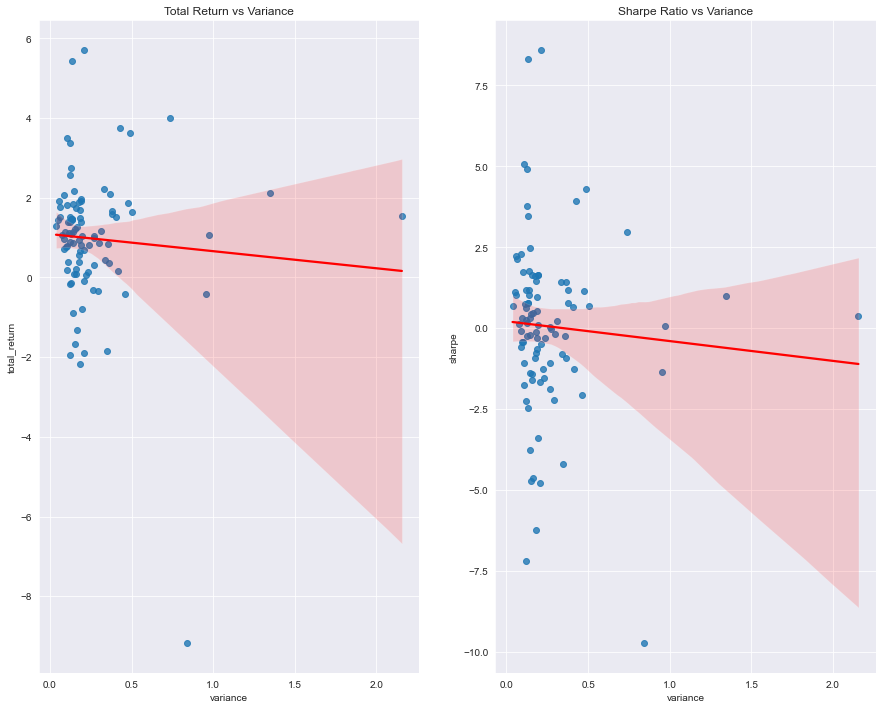

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 12), sharex=True)
sns.regplot(x=df_results['variance'], y=df_results['total_return'], ax=ax1,line_kws={"color": "red"} )
ax1.set_title('Total Return vs Variance')
sns.regplot(x=df_results['variance'], y=df_results['sharpe'], ax=ax2, line_kws={"color": "red"})
ax2.set_title('Sharpe Ratio vs Variance')

We can see that variance negatively correlates with sharpe and total return (though weakly), confirming that we should stick to lower beta variance stocks to run beta-hedging strategies.

In [12]:
print('Average Sharpe: ', np.mean(df_results['sharpe']))

Average Sharpe:  0.05398199701960172


In [13]:
print('Average Total Return: ', np.mean(df_results['total_return']))

Average Total Return:  0.9779571677499438


# Conclusion

I think the historical rolling beta (at least for a window of 20) offers alright hedging performance, we can see that the average total return for beta-hedged portfolios was 0.978, a 2.2% loss over the period of 473 days, or average loss of 0.00465% per day. I think the loss is tolerable for short term hedging, though results of short term hedging will vary more.

Looking at the average sharpe, it is quite poor, meaning this version of beta is bad for beta neutral investing or anything else that isn't simply hedging. Either that or the sharpe is a bad metric to evaluate beta. If risk adjusted returns is a goal, it's better to just hold index funds.

# Possible Improvements

- I think since some stocks have asymmetric volatility, multiple betas should be calculated, one beta for each volatility regime in order to minimize the error, assuming we continue to use historical beta. Then we can beta hedge using a regime switching model, and in regime beta variance will be lowered. One example would be $HYG (not in this dataset), during market downturns, HYG is significantly more volatile than during bull markets.
- The beta window should also exclude outlier days, like if some stock specific event happened, since it's not representative of normal days.
- We should attempt to predict beta for the period we intend to hedge for, beta is backwards looking and won't always hold true for the future. Predicted beta might be better to reduce short term variance as well, as these results are over a long period of time, the error is less pronounced.
- In general, we should analyze other factors like volume, interest rates, options data, to see how beta behaves during different market conditions. We want to identify market conditions where beta is as near constant as possible, and only engage in beta hedging strategies during such conditions.